# Report 7: Bouncing Ping Pong Ball

## Jillian Annis

### Introduction

After a ping pong ball has been dropped from some initial height onto a hard, solid surface, it bounces back up.  However, it does not bounce back up to the initial height.  Because of this, the collision between the ball and the surface can be characterized as an inelastic collision.  In physics, an inelastic collision is a type of collision in which some of the kinetic energy in the system is transferred to other forms of energy such as thermal or sound energy.  Therefore, we say that in inelastic collisions, the kinetic energy is not conserved.

A simple model of this inelastic collision can be obtained by using the equations for projectile motion.  The height of the ball after each ith bounce is given by 

$$y = v_it - \frac{1}{2}gt^2$$

If y is set equal to 0, which corresponds to the ball hitting the surface, an equation for the time of the ith collision can be derived

$$t_i = \frac{2v_i}{g}$$

Furthermore, assume that the amount of kinetic energy lost after each bounce is a constant, x, so that the new kinetic energy is a fraction of the previous kinetic energy:

$$KE_{i+1} = xKE_i$$

We know that $KE = \frac{1}{2}mv^2$$

$$\frac{1}{2}mv_{i+1}^2 = x\frac{1}{2}mv_i^2$$

Divide out the $\frac{1}{2}m$

$$v_{i+1}^2 = xv_i^2$$

Take the square root of both sides

$$v_{i+1} = \sqrt{x}v_i$$

Let $\sqrt{x} = r$

$$v_{i+1} = rv_i$$

Following this, we can then show that

$$t_{i+1} = \frac{2v_{i+1}}{g} = \frac{r2v_i}{g} = r\frac{2v_i}{g} = rt_i$$

### Task Statement

The goal of this report is to test whether or not the real behavior of the ping pong ball fits the model above.  If it is correct, then the time between bounces (or collisions) should be reduced by a fixed amount, r, with each bounce.  There are several subtasks that will help prove that the model fits:

1) Load and plot the sound amplitude data against time.

2) Extract the time of each bounce, and indicate on the plot from (1) where the bounces occur.

3) Calculate the least squares straight fit line to the logarithm of the time intervals between the bounces then plot it with the original data to determine if it is the correct fit.  From this, find the fixed fraction, r, that the time and kinetic energy decreases by.  

4) Plot the sound amplitude against time for a single bounce and estimate the dominant frequency of the "ringing" of the ping pong ball after each collision.

### Method and Results

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Exercise 1

In [2]:
from scipy.io import wavfile

First, *wavfile* is imported from scipy.io in order to import the ping pong sound data.  The file "pingpong.wav" contains both the sampling rate and the actual sound amplitude data.  After all of the data is imported, the desired sound data is spliced out of the entire data set, and this spliced data is called **sound**.  The reason the **sound** data array only goes to index 315,000 is because all sound after this index is due to the ball rolling on the surface, and not due to any bouncing.

Next, we must create the **time** array.  First, the *len()* function is used to return the number of elements in the **sound** array, and this number, 315,000, is stored to **npts**.  Then, **npts** is passed into *arange()* to create an array of **npts**.  That is, the array will contain 315,000 points from 0 to 314,999.  This array is then divided by the sampling rate to convert the array values into time values (in seconds).

The plot below shows the sound amplitude plotted against time.

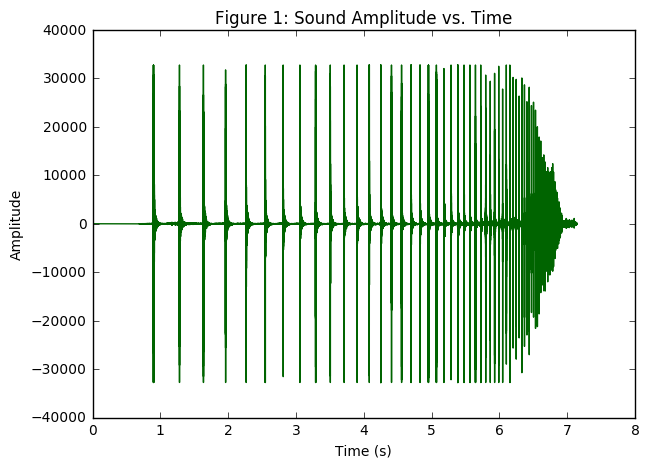

In [3]:
rate,data=wavfile.read("pingpong.wav")

sound=data[:315000,0]
npts=len(sound) #returns the number of elements in sound
time=arange(npts)/rate #the sampling rate is 44100

figure(figsize=(7,5))
title("Figure 1: Sound Amplitude vs. Time")
xlabel("Time (s)")
ylabel("Amplitude")
plot(time,sound, color='darkgreen');

**Figure 1** shows the amplitude of the sound wave plotted against the time.  For 0 < time < 6, the amplitude of the sound stays relatively constant.  After 6s, however, the amplitude begins to quickly decrease in a short period of time, reaching around a height of 0 after about 1 second (so at time = 7s).

#### Exercise 2

For this exercise, we must find, extract, and indicate the time of each bounce of the ping pong ball.  First, we start by finding the first bounce peak, or the first large spike on the graph.  Because the first spike has the largest amplitude, the *argmax()* function can be used over the entire sound data.  This function returns the index of the maximum amplitude of the data, and this index corresponds to the first spike.  We assign this first index to **T0**.  Later, this specific **T0** will be replaced, and **T0** will be used to hold the index of the last spike found. 

Now that we have the index of the first spike, we can now find the rest of the indices of all the other spikes.  To do this, we will search for the spikes over an arbitrarily defined window.  Before we implement the code to find the spike index and move the window, some variables must be defined.  **Wait** is an arbitrary distance chosen to define the boundaries of the window.  In this case, 7000 was chosen because it looks to be about half the distance between **T0** and the next spike.  **Tmax** is the maximum index that will be used to obtain all of the spike index values.  Any spikes with indices above **Tmax** will not be considered.  Lastly, **bounce_times** is the list that will hold all the indices of the spikes.  

*While* the index of the initial or current spike (**T0**) is less than the **Tmax**, the defined window will be moved and the next spike will be searched for.  In the *while* loop, **start** and **end** define the bounds of the window.  **Start** is the initial/current spike index plus the **Wait**, and **end** is the initial/current spike index plus 3 times the **Wait**.  The reason the **Wait** is multiplied by 3 is to move the window boundary past the next spike.  2 times the **Wait** would cause the end window boundary to sit directly on top of the next spike because (2)(7000) = 14000 is roughly the distance between the two spikes.

To actually focus on only that window of indices, we splice the original sound data.  *sound[start:end]* splices out only the sound data with the indices between the **start** and **end** bounds of the window.  We use *argmax()* on this spliced sound data to find the index of the spike.  However, this index is not the actual index of the spike, but the index of the spike within the window.  In other words, the index in the window is not the same as the index in the original data.  To get the actual index of the spike in the original sound data, the **start** value is added to this relative window index.  The actual index is stored as **T1**, and now that we have the index of the new spike, we append this value to the **bounce_times** list.

Because the distance between each spike gets smaller with each bounce, we update the **Wait** by subtracting the **T1** and **T0** index values and dividing by 2.  This is the distance (or index) halfway between the two values.  The last step is to set the newly found **T1** index as the current **T0** index in order to find the next spike.

To plot all of the vertical lines to mark the bounce times of each spike, we use a *for* loop.  Because we have a list, **bounce_times**, of the indices that belong to each spike, we can index the **time** array by this list to pull out the times that correspond to each spike.  The code for this is *time[bounce_times]*.  We loop over this new array to plot a vertical line at each spike.

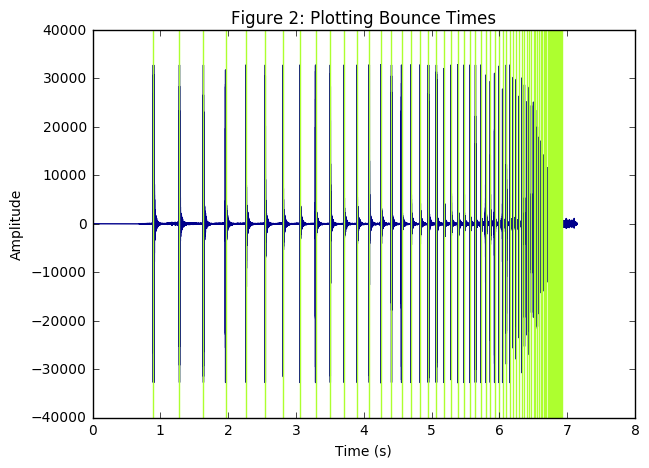

In [4]:
T0=argmax(sound) #index of max value

Wait=7000 #set arbitrary wait time, half the distance to T1
Tmax=305000
bounce_times=[T0]

while T0 < Tmax:
    start=T0+Wait
    end=T0+3*Wait
    relative=argmax(sound[start:end]) #slice sound to the window, relative index in the window
    T1=relative+start #get actual index from T0
    bounce_times.append(T1)
    Wait=int((T1-T0)/2) #must turn into integer for indexing
    T0=T1

figure(figsize=(7,5))
title("Figure 2: Plotting Bounce Times")
xlabel("Time (s)")
ylabel("Amplitude")    

plot(time,sound, color='darkblue')

for l in time[bounce_times]:
    axvline(l ,color='greenyellow')

**Figure 2** shows the original sound data plotted with corresponding bounce/spike times.  The bright green vertical lines indicate the time when each spike occurs.

#### Exercise 3

In this exercise, we must calculate the least squares straight fit line to the logarithm of the time intervals between the bounces then plot it with the original data to determine if it is the correct fit.  Using this, we must find the fixed fraction, r, that the energy decreases by.

In order to find the least squares regression, we must calculate the varaibles in the regression equations given by 

$$\begin{bmatrix} 1 & \bar{x} \\ \bar{x} & \bar{x^2}\end{bmatrix} \begin{bmatrix} w_0 \\ w_1\end{bmatrix} = \begin{bmatrix} \bar{y} \\ \bar{xy}\end{bmatrix}$$

First, we convert the **bounce_times** list into an integer array so that it can be used to find the intervals between the bounce times.  These intervals are calcualted by slicing the **bounce_times** array in two ways such that when the two newly sliced arrays are subtracted, the difference between the times of any two consecutive spikes is found.  The intervals are saved into an array named **interval**.

The variables required for the matrices are as followed:
* $\bar{x}$ (xbar) is the mean of the number of bounces array, **i**.  The **i** array is created by using *arange()* and the length of the **interval** array.  We must use the length of the **interval** array and not the **bounce_times** array because there is 1 less bounce interval than there are bounce times.  Later when we find $\bar{xy}$, the dimensions of the arrays must match for them to be multiplied together, and so if **bounce_times** was used instead of **interval**, the dimensions would not match.
* $\bar{y}$ (ybar) is the mean of the log of the **interval** array.
* $\bar{x^2}$ (x2bar) is the mean of the square of the number of bounces array.
* $\bar{xy}$ (xybar) is the mean of the product of the number of bounces array and the log of the **interval** array.

In [5]:
bounce_times=array(bounce_times, dtype=int) #convert the bounce_times list into an integer array, array of 73 entries
interval=bounce_times[1:]-bounce_times[:-1] #lose 1 element, have 73 times, but 72 intervals
i=arange(len(interval)) #number of bounces, array of 72 entries
y=log(interval) # log of the bounce interval, array of 72 entries

xbar=mean(i)
ybar=mean(y)
x2bar=mean(i**2)
xybar=mean(i*y)

Since we have all the necessary variables defined, we can now solve the regression equations above to find the constants $w_0$ and $w_1$.  In the code below, *linalg.solve(A,b)* solves for the two constants.

These two constant correspond to the equation 

$$y=w_1x+w_0$$

so we must relate these constants to the equation we want to plot,

$$log(y)=i*log(r)+log(t_0)$$

We can see that:

$$log(t_0)=w_0$$  
or,$$t_0=e^{w_0}$$

and $$log(r)=w_1$$
or, $$r=e^{w_1}$$

After finding $t_0$ and **r**, we then calculate $t_i$.  In the introduction section, we defined that the next time, $t_{i+1}$, can be found by multiplying the current time, $t_i$, by **r**.  If the model is correct, plotting the *semilogy* of **i** and $t_i$ will yield a linear line because we assume the relation between the next time and the current time is 

$$t_i=r^it_0$$ 

which is equivalent to 

$$t_{i+1}=rt_i$$ 

from the introduction.

Note: *semilogy* plots the straight line $log(y)=log(A)+n*log(x)$ from the function of the form $y=Ax^n$.

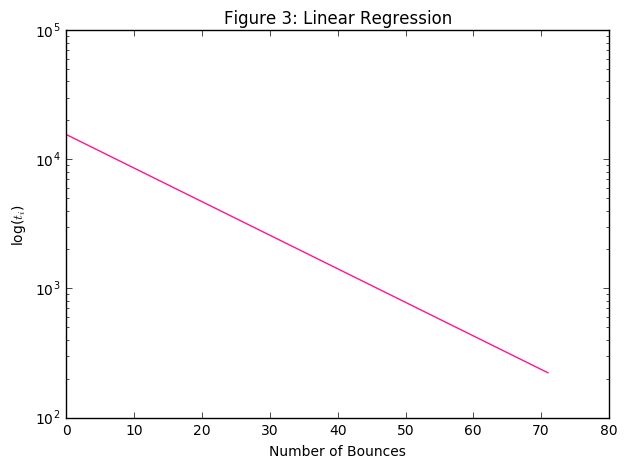

In [6]:
A=array([[1,xbar],[xbar,x2bar]])
b=array([ybar, xybar])
w0,w1=linalg.solve(A,b)

t0=exp(w0)
r=exp(w1)

ti=(r**i)*t0

figure(figsize=(7,5))
title("Figure 3: Linear Regression")
xlabel("Number of Bounces")
ylabel("log($t_i$)")  
semilogy(i,ti, color='deeppink');

Because the graph in **Figure 3** is a straight line, the relationship between **i** and log($t_i$) is linear.  Therefore, the relationship between **i** and $t_i$ is exponential.  From this, we can conclude that 

$$t_i=r^it_0$$

or

$$t_{i+1}=rt_i$$

hold true.

The plot below is the linear regression and the *semilogy* of the original data is plotted together.

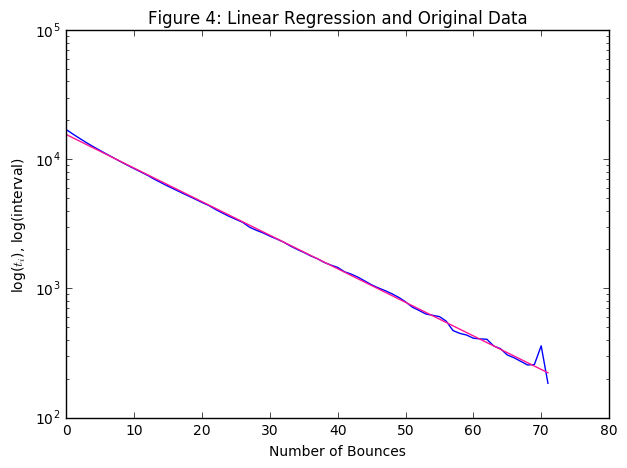

In [7]:
figure(figsize=(7,5))
title("Figure 4: Linear Regression and Original Data")
xlabel("Number of Bounces")
ylabel("log($t_i$), log(interval)") 
semilogy(i,interval, color='blue')
semilogy(i, ti, color='deeppink'); #good approx.

Because the linear regression and the original data mostly overlap, it can be concluded that the linear regression is a good approximation for the original data.

Since it is a good model, we can use it to find **r** (which we did earlier).

In [8]:
print("The fixed fraction of energy lost on each bounce is", r)

The fixed fraction of energy lost on each bounce is 0.941957605173


#### Exercise 4

For this last exercise, we must examine one bounce to find the dominant "ringing" frequency of the ping pong ball after each collision.

The single bounce used was the first bounce in the data, and this corresponds to the slice *data[39400:41500,0]* of the original data.  **Figure 5** is this single bounce plotted against time.

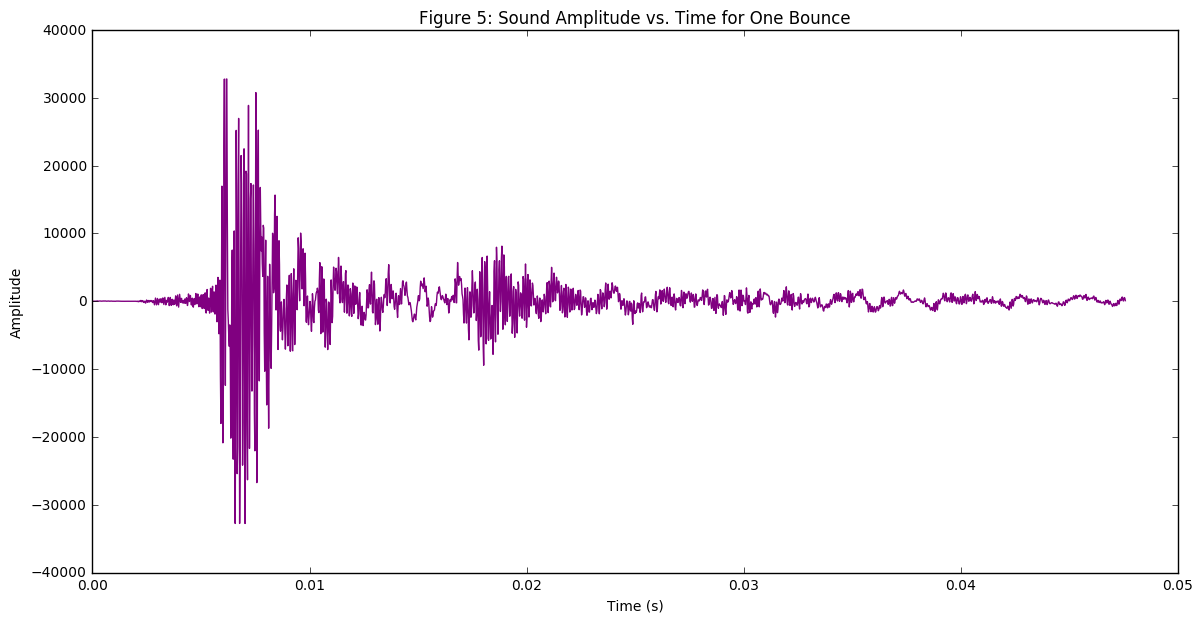

In [9]:
single_bounce=data[39400:41500,0]
npts=len(single_bounce)
time=arange(npts)/rate

figure(figsize=(14,7))
title("Figure 5: Sound Amplitude vs. Time for One Bounce")
xlabel("Time (s)")
ylabel("Amplitude")
plot(time,single_bounce, color='purple');

Next, we must find the dominant "ringing" frequency in this bounce.  For this, we use the *psd* function which plots the frequency content, or power spectral density, of the signal (or sound wave in this case).  In the *psd* function, we must take into account the sampling rate, 44100.

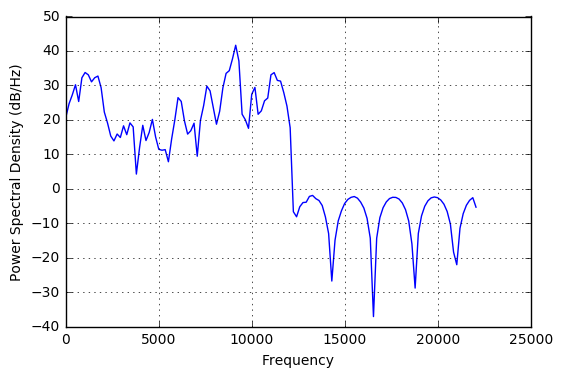

In [10]:
sb_psd=psd(single_bounce, Fs=44100); #tuple

The dominant "ringing" frequency occurs at the largest power spectral density.  The largest PSD is 40 dB/Hz, and by visual inspection, the corresponding frequency is about 9000Hz.  Therefore, the dominant frequency is around 9000Hz.

Just for fun, let's find the actual frequency.  The *psd* function above was assigned to a variable, **sb_psd**, and it was discovered that **sb_psd** is a tuple (this was determined using sb_psd.dtype; error: "tuple object has no attribute 'dtype').  The first array in the tuple contains the y-axis values, or the PSD values.  *argmax()* was used on this array to find the index of the largest PSD amplitude.  The second array in the tuple is the frequency data, and it is the same size as the first array, so the index of the largest amplitude can be used to obtain the corresponding frequency value.  Implementing this code allows for the actual dominant frequency to be found.

In [11]:
amp=sb_psd[0] #1st array in tuple, corresponds to y axis values
maxamp=argmax(amp) #index of max amp
frequency=sb_psd[1] #2nd array in tuple, corresponds to frequency (xaxis), same size as 1st array so same indexes
frequency[maxamp] #max frequency

9130.078125

Therefore, the dominant "ringing" frequency is actually 9130Hz, and my visual estimate of 9000Hz was pretty accurate.  

### Conclusion

The main goal of this report was to test whether or not the real behavior of the ping pong ball fits the model described in the introduction.  To see if the model fits there were several tasks that needed to be completed.  First, the sound amplitude data was loaded into the notebook and then plotted against time.  Next, the time of each bounce was extracted and indicated on the original plot.  Then, the least squares regression was found and then compared to the original data.  Finally, the dominant "ringing" frequency of the collisions was determined from a single bounce.  After doing all of these tasks, it was concluded that the model was a good fit, and the dominant frequency was estimated to be about 9000Hz.